<span style="color:#e5065c; font-size:28px; font-weight:700">  Decision Trees</span>

In this notebook, we will look into tree-based methods for regression and classification.
These involve stratifying or segmenting the predictor space into a number of simple regions. 
In order to make a prediction for a given observation, 
we typically use the mean or the mode of the training observations in the region to which it belongs. 
Since the set of splitting rules used to segment the predictor space can be summarized in a tree, 
these types of approaches are known as decision tree methods.


<span style="color:#0cd331; font-size:24px; font-weight:700"> Regression Trees</span>

*** Predicting Baseball Players’ Salaries Using Regression Trees* ** 

Let's consider the _Hitters_ data set to predict a baseball player’s `Salary` based on `Years`
(the number of years that he has played in the major leagues) and `Hits` 
(the number of hits that he made in the previous year). 
We first remove observations that are missing `Salary` values, 
and log-transform `Salary` so that its distribution has more of a typical bell-shape. 
Note: Salary is measured in thousands of dollars.

The figure below shows a regression tree fit to this data. 
It consists of a series of splitting rules, 
starting at the top of the tree. 
The top split assigns observations having <span style="color:#a5541a">$Years<4.5$</span> to the left branch. 
The predicted salary for these players is given by the mean response value for the players 
in the data set with <span style="color:#a5541a">$Years<4.5$</span>. 

For such players, the mean log salary is 5.107, and so we make a prediction of $\epsilon^{5.107}$ 
thousands of dollars, i.e. \$165,174, for these players. 
Players with $Years>=4.5$ are assigned to the right branch, 
and then that group is further subdivided by Hits. 
Overall, the tree segments the players into three regions of predictor space: 
 * players who have played for four or fewer years, 
 * players who have played for five or more years and who made fewer than 118 hits last year, and 
 * players who have played for five or more years and who made at least 118 hits last year.

<img src="../images/simple_decision_tree.PNG"/>$$Figure\ 1$$

These three regions can be written as 

$$R_1 ={X | Years<4.5}$$
$$R_2 ={X | Years>=4.5,\quad Hits<117.5}$$
$$R_3 ={X | Years>=4.5, \quad Hits>=117.5}$$

The figure below illustrates the regions as a function of Years and Hits. The predicted salaries for these three groups are \$1,000×$\epsilon^{5.107}$ = \$165,174,  \$1,000×$\epsilon^{5.999}$ = \$402,834, and  \$1,000×$\epsilon^{6.740}$ = \$845,346 respectively.

<img src="../images/decision_regions.PNG"/>$$Figure\ 2$$


In keeping with the tree analogy, the regions R1, R2, and R3 are known as terminal nodes or leaves of the tree. 
As is the case for Figure 1, decision trees are typically drawn upside down, 
in the sense that the leaves are at the bottom of the tree. 
The points along the tree where the predictor space is split are referred to as internal nodes. 
In Figure 1, the two internal nodes are indicated by the text `$Years<4.5$` and `$Hits<117.5$`. 
We refer to the segments of the trees that connect the nodes as branches.


The regression tree displayed in Figure 1 can be interpreted as follows:
<span style="color:#a5541a">Years</span> is the most important factor in determining Salary, 
and players with less experience earn lower salaries than more experienced players. 
Given that a player is less experienced,
the number of hits that he made in the previous year seems to play little role in his salary.
But among players who have been in the major leagues for five or more years, 
the number of hits made in the previous year does affect salary, 
and players who made more hits last year tend to have higher salaries. 
The regression tree shown in Figure 1 is likely an over-simplification of the true relationship between <span style="color:#a5541a">Hits, Years, and Salary</span>. 
However, it has advantages over other types of regression models where it is easier to interpret, and has a nice graphical representation.

<span style="color:#0cd331; font-size:18px; font-weight:700">  Prediction via Stratification of the Feature Space </span>

The two steps below constitute building a regression tree.

1. Divide the predictor space — that is, the set of possible values for $X_1,X_2, . . .,X_p$ — into J distinct and non-overlapping regions, $R_1,R_2, . . . , R_J$.
2. For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

For instance, suppose that in Step 1 we obtain two regions, R1 and R2, 
and that the response mean of the training observations in the first region is 10, 
while the response mean of the training observations in the second region is 20. 
Then for a given observation $X = x$, if $x \in R_1$ we will predict a value of 10, 
and if $x \in R_2$ we will predict a value of 20.

Let's see how regions $R_1, . . .,R_J$ are constructed. 
The regions could have any shape. 
However, we choose to divide the predictor space into high-dimensional rectangles, or boxes, 
for simplicity and for ease of interpretation of the resulting predictive model.
The goal is to find boxes $R_1, . . . , R_J$ that minimize the RSS, given by

$$\sum_{j=1}^J \sum_{i \in R_j} (y_i - {\hat{y}}_{R_j})\ ,$$
where ${\hat{y}}_{R_j}$ is the mean response for the training observations within the $j_{th}$ box. 
We take a top-down, greedy approach that is known as recursive binary splitting. 
The approach is top-down because it begins at the top of the tree. 
It is greedy because at each step of the tree-building process, 
the best split is made at that particular step, 
rather than looking ahead and picking a split that will lead to a better tree in some future step. 


In order to perform recursive binary splitting, 
we first select the predictor $X_j$ and the cutpoint `s` such that splitting the predictor space 
into the regions ${X|X_j < s}$ and ${X|Xj ≥ s}$ leads to the greatest possible reduction in RSS  (residual sum of squares). 
(The notation ${X|X_j < s}$ means the region of predictor space in which Xj takes on a value less than `s`.) 
That is, we consider all predictors $X_1, . . .,X_p$, 
and all possible values of the cutpoint `s` for each of the predictors,
and then choose the predictor and cutpoint such that the resulting tree has the lowest RSS.



<span style="color:#2e8dc9; font-size:16px; font-weight:700">  Tree Pruning</span>

The process described above may produce good predictions on the training set, 
but is likely to overfit the data. 
This is because the resulting tree might be too complex. 
A smaller tree with fewer splits might lead to lower variance and better interpretation 
at the cost of a little bias. 
One possible solution is to build the tree only so long as the decrease in the RSS due to each split exceeds some (high) threshold. The strategy is to grow a very large tree $T_0$, 
and then prune it back in order to obtain a subtree. 

The goal is to select a subtree that leads to the lowest test error rate. 
Given a subtree, we can estimate its test error using cross-validation or the validation set approach.



-----

<span style="color:#2e8dc9; font-size:16px; font-weight:700"> Inducing a Regression Tree</span>


1. Use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.

2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of $\alpha$.

3. Use K-fold cross-validation to choose $\alpha$. That is, divide the training observations into $K$ folds. For each $k = 1, . . .,K$:

    (a) Repeat Steps 1 and 2 on all but the $k{th}$ fold of the training data.
    
    (b) Evaluate the mean squared prediction error on the data in the left-out $k{th}$ fold, as a function of $\alpha$.
    
    Average the results for each value of $\alpha$, and pick $\alpha$ to minimize the average error.
    
4. Return the subtree from Step 2 that corresponds to the chosen value of $\alpha$.

<span style="color:#0cd331; font-size:18px; font-weight:700">  Fitting Regression Trees with R</span>

Here we fit a regression tree to the `Boston` data set. 
First, we create a training set, and fit the tree to the training data.

In [1]:
library(MASS)
set.seed (1)
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [2]:
dim(Boston)

[1] 506  14

The `sample()` function below takes a sample of the specified size (second arguement which is 253) 
from the elements of x (first arguement which is 506) using either with or without replacement. 
By default it is without replacement. 
So, we are randomly selecting indexes to create a train and test subsets. 

In [3]:
?sample

In [4]:
train = sample(1:nrow(Boston), nrow(Boston)/2)

In [5]:
library(rpart)

fit <- rpart(medv~., method="anova", data=Boston, subset=train)

summary(fit) # detailed summary of splits

Call:
rpart(formula = medv ~ ., data = Boston, subset = train, method = "anova")
  n= 253 

          CP nsplit rel error    xerror       xstd
1 0.46257558      0 1.0000000 1.0127304 0.11772795
2 0.20467339      1 0.5374244 0.5633934 0.05969933
3 0.07461842      2 0.3327510 0.3494856 0.03994467
4 0.03919129      3 0.2581326 0.2960757 0.03997597
5 0.03208187      4 0.2189413 0.3107221 0.04807582
6 0.02162884      5 0.1868595 0.2950782 0.04805304
7 0.01114973      6 0.1652306 0.2614557 0.04260435
8 0.01000000      7 0.1540809 0.2503241 0.03701355

Variable importance
  lstat      rm   indus     nox    crim      zn     dis     age ptratio     rad 
     28      23      12      12      11       9       3       2       1       1 

Node number 1: 253 observations,    complexity param=0.4625756
  mean=22.67312, MSE=82.58758 
  left son=2 (150 obs) right son=3 (103 obs)
  Primary splits:
      lstat   < 9.715    to the right, improve=0.4625756, (0 missing)
      rm      < 6.803    to the left, 

Notice that the output of `printcp()` indicates that only three of the variables have been 
used in constructing the tree. 
We now plot the tree.

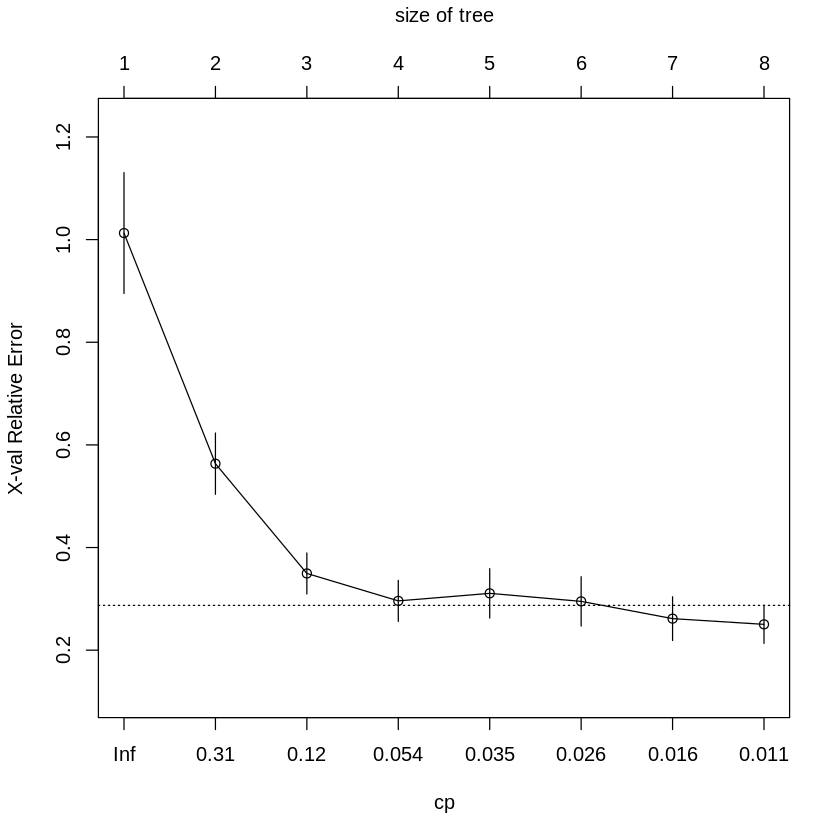

In [6]:
plotcp(fit) 

# plotcp() gives a visual representation of the cross-validation results in an rpart object.
# It returns the set of possible cost-complexity prunings (see the x axis, "cp") of a tree from a nested set. 

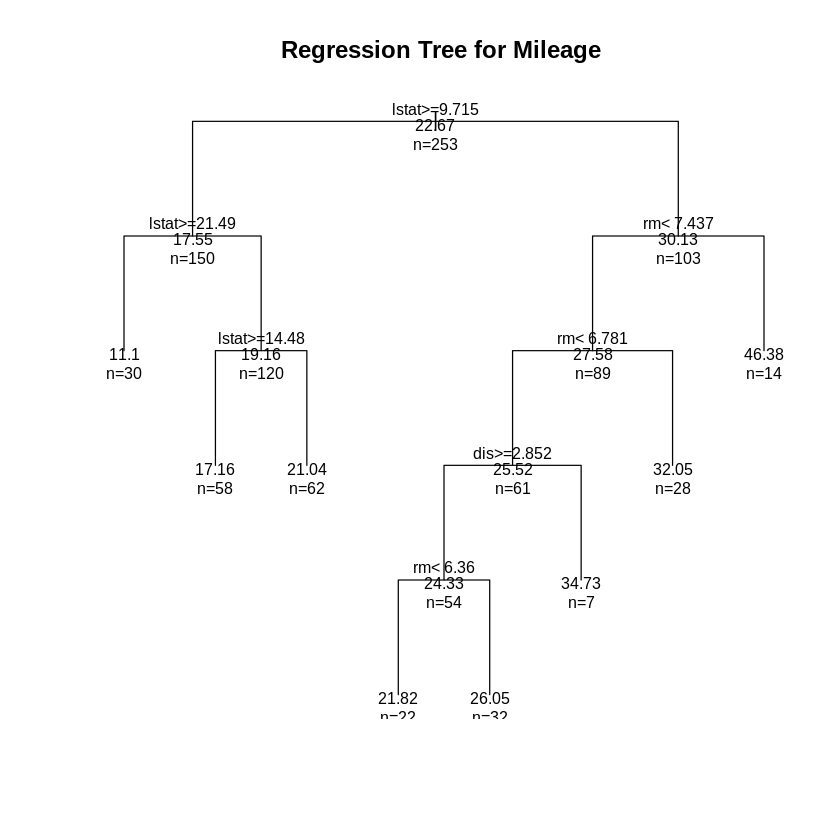

In [7]:
# plot tree 
plot(fit, uniform=TRUE, 
     main="Regression Tree for Mileage ")
text(fit, use.n=TRUE, all=TRUE, cex=.8)

The variable `lstat` measures the percentage of individuals with lower socioeconomic status. 
The tree indicates that lower values of `lstat` correspond to more expensive houses. 
The tree predicts a median house price of $46,400 for larger homes in suburbs in which 
residents have a high socioeconomic status (`rm>=7.437` and `lstat<9.715`).

<span style="color:#2e8dc9; font-size:16px; font-weight:700"> Pruning the tree</span>

Now we use the `prune()` function to see whether pruning the tree will improve performance.

In [8]:
names(fit)

# prune the tree 
pfit <- prune(fit, cp = 0.016) 
# cp is from cptable 
# A good choice of cp for pruning is often the leftmost value for which the mean lies below the horizontal line.
# So looking at the returned plot for plotcp() above, that value is 0.016.

[1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "variable.importance"
[13] "y"                   "ordered"

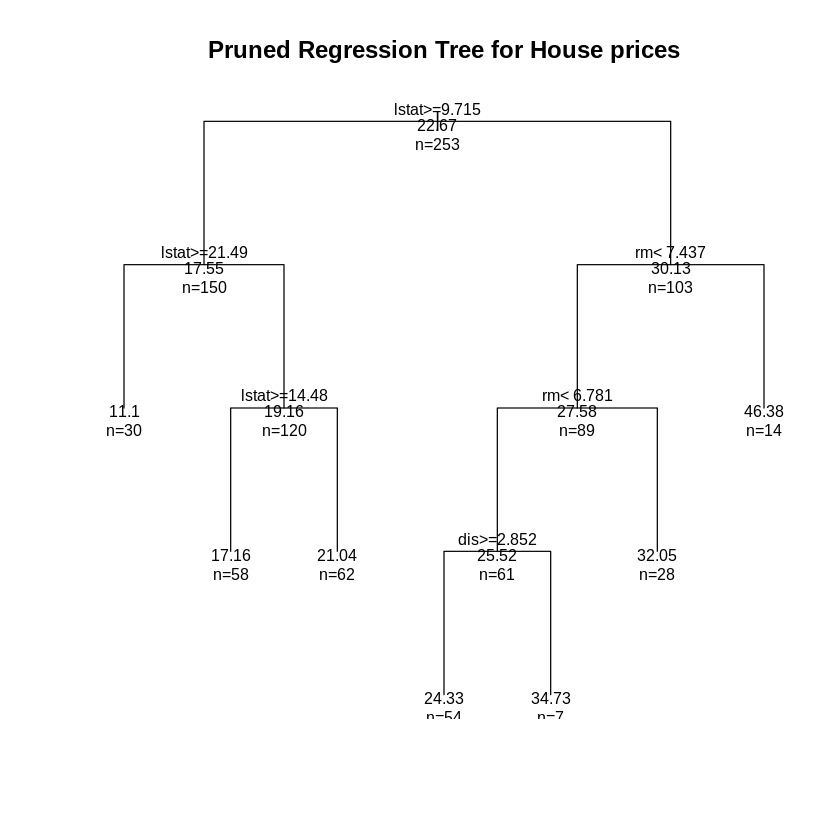

In [9]:
# plot the pruned tree 
plot(pfit, uniform = TRUE,   main = "Pruned Regression Tree for House prices")
text(pfit, use.n = TRUE, all = TRUE, cex = .8)

Both trees almost look similar.

Now we will look at the `rpart` library.

In [10]:
library("rpart")

# rpart provides recursive partitioning for classification, regression 
# and survival trees. 


In [11]:
tree <- rpart(medv~., data=Boston, subset=train)

In [12]:
?rpart

In [14]:
install.packages(c("rpart.plot","RColorBrewer"))
library(rpart.plot)
library(RColorBrewer)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


The `rpart.plot()` and `RcolorBrewer()` functions help us to create a beautiful plot. 
`rpart.plot()` plots rpart models.
It extends `plot.rpart` and `text.rpart` in the rpart package. 
`RcolorBrewer()` provides us with beautiful color palettes and graphics for the plots.

also installing the dependency ‘XML’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: tibble
Loading required package: bitops
Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


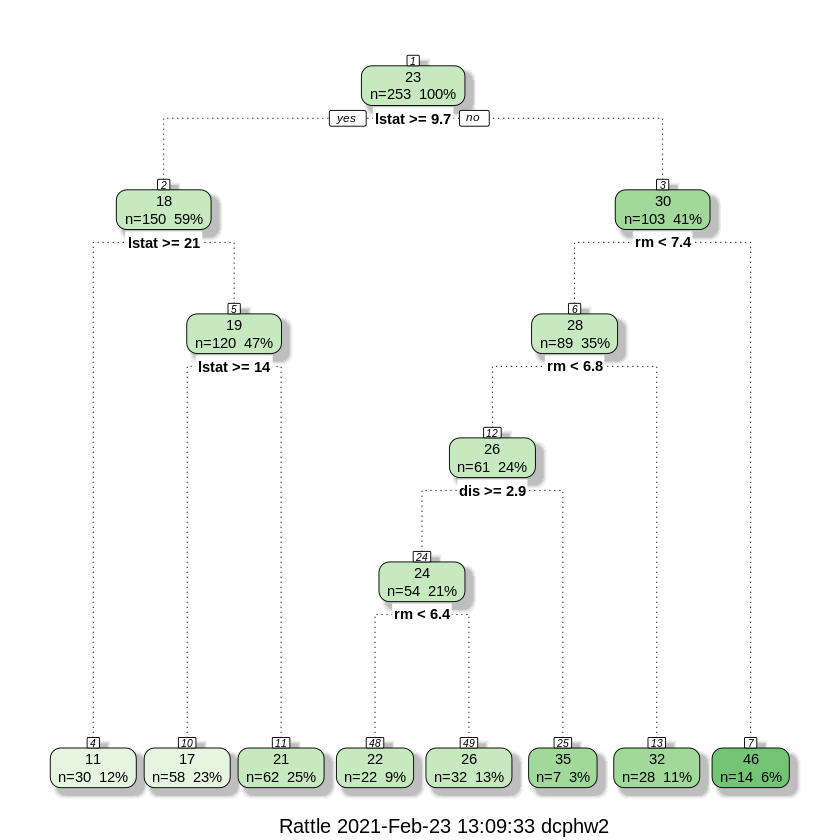

In [15]:
install.packages("rattle")
library(rattle)
fancyRpartPlot(tree)

In [16]:
?fancyRpartPlot

We will use the unpruned tree to make predictions on the test set.

[1] 25.35825

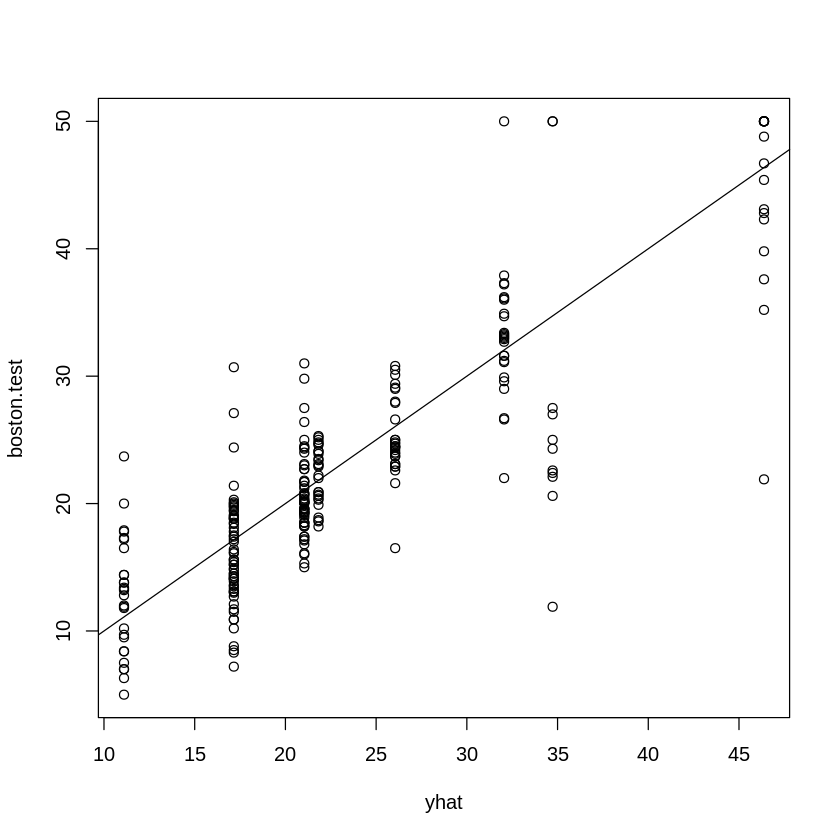

In [17]:
yhat = predict(fit, newdata = Boston[-train ,])
boston.test = Boston[-train ,"medv"]
plot(yhat, boston.test)
abline (0,1)
mean((yhat -boston.test)^2)

In other words, the test set MSE associated with the regression tree is 25.35. 
The square root of the MSE is therefore around 5.005, 
indicating that this model leads to test predictions that are within around $5,005 
of the true median home value for the suburb.

# Save your notebook!